<a href="https://colab.research.google.com/github/cjchaitali/ADR_extraction/blob/main/RNN_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [ ]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

### Feature Scaling

In [ ]:
#Apply normalisation X_norm= (X- min(x))/(max(x)-min(x))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

### Creating a data structure with 60 timesteps and 1 output

In [ ]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train #previous 60 stock prices

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [ ]:
y_train #next i+1 stock price

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

### Reshaping

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) #3D shape(with layer 0,1,2)

In [ ]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [ ]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
#Dropout is added to avoid overfitting. 20% of neurons are ignored at LSTM level.

### Adding a second LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [ ]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [ ]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 11s 112ms/step - loss: 0.1034
Epoch 2/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0078
Epoch 3/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0054
Epoch 4/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0055
Epoch 5/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0051
Epoch 6/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0049
Epoch 7/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0060
Epoch 8/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0046
Epoch 9/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0055
Epoch 10/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0043
Epoch 11/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0047
Epoch 12/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0040
Epoch 13/100

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [ ]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

### Getting the predicted stock price of 2017

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0) #axis = 0 for vertical column concatenation
#in 1 month we have 20 financial days therefore 60 days is of 3 months
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
predicted_stock_price

array([[792.5609 ],
       [789.894  ],
       [789.4812 ],
       [790.36536],
       [793.2774 ],
       [798.79297],
       [804.5215 ],
       [807.8135 ],
       [809.0644 ],
       [809.17017],
       [808.8248 ],
       [808.2996 ],
       [807.8399 ],
       [808.04614],
       [808.7975 ],
       [812.74774],
       [819.24005],
       [826.8473 ],
       [832.0297 ],
       [830.01697]], dtype=float32)

### Visualising the results

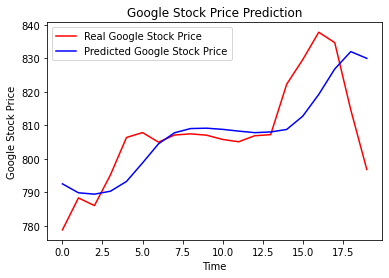

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
rmse

11.799125825256212